# 📊 Superstore Data Analysis
This notebook performs an analysis of the Superstore dataset, including data cleaning, exploratory data analysis (EDA), and visualization.

## 🔹 Step 1: Importing Necessary Libraries
We start by importing Pandas, NumPy, Matplotlib, and Seaborn for data manipulation and visualization.

## 🔹 Step 2: Loading the Dataset
The dataset is read using `pd.read_csv()`, and the first few rows are displayed using `df.head()` to understand the structure.

## 🔹 Step 3: Handling Missing Values
We check for null values using `df.isnull().sum()` to identify any missing data in the dataset.

In [1]:
# Importing necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset into a Pandas DataFrame
# Using ISO-8859-1 encoding to handle special characters
df = pd.read_csv(r'C://Users//Asus//Downloads//Superstore.csv', encoding="ISO-8859-1")

# Display the first few rows of the dataset to understand its structure
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Checking for missing values in each column of the dataset
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df['Discount'].fillna(df['Discount'].mean(),inplace=True)

In [11]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [12]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

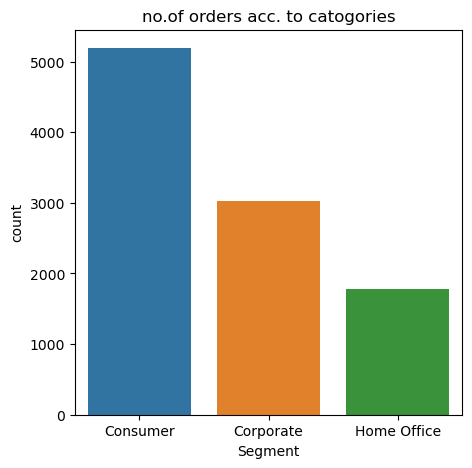

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Segment'],data=df)
plt.title("no.of orders acc. to catogories")
plt.savefig("no.-ofOrders.jpg")

In [23]:
df["Category"].isnull().sum()

0

In [45]:
df["Category"].value_counts()

array([6026, 2121, 1847], dtype=int64)

([<matplotlib.patches.Wedge at 0x2361d2ec550>,
 [Text(0.9663952556281559, 0.5254333543841613, 'Office Supplies'),
  Text(-1.0962492840402087, 0.09076071419578935, 'Furniture'),
  Text(-0.43449976106613525, -1.0105493345866254, 'Technology')],
 [Text(0.527124684888085, 0.2866000114822697, '60.30%'),
  Text(-0.5979541549310229, 0.049505844106794185, '21.22%'),
  Text(-0.23699986967243739, -0.5512087279563411, '18.48%')])

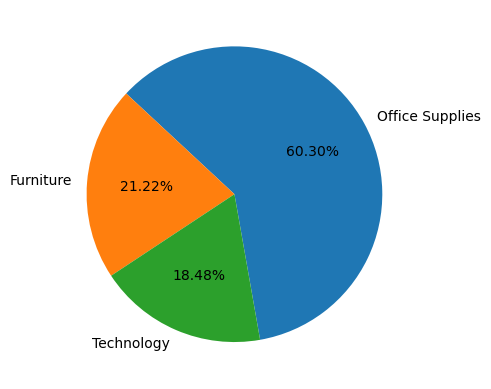

In [50]:
x=df["Category"].value_counts().index
y=df["Category"].value_counts().values
plt.pie(y,labels=x,autopct='%0.2f%%',startangle=280)

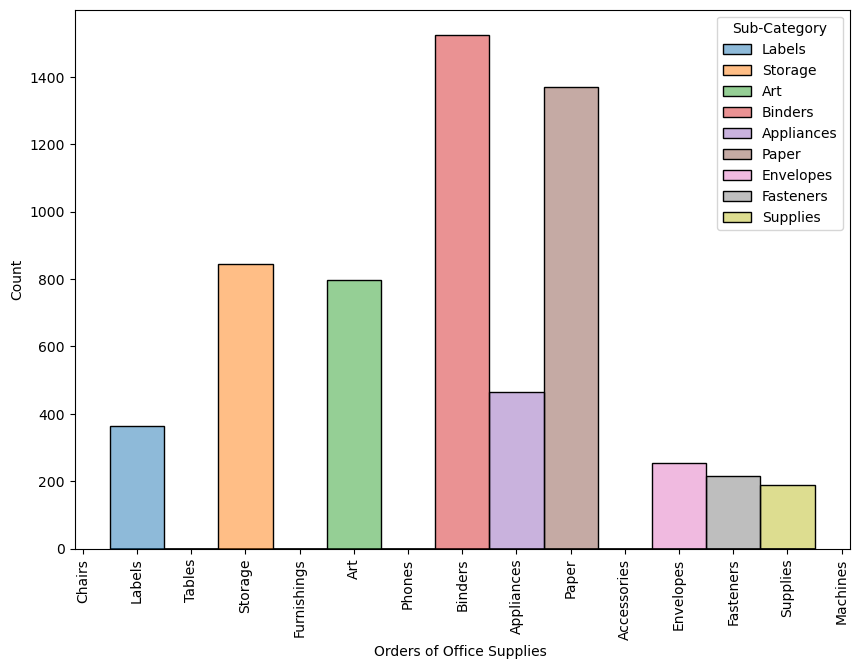

In [98]:
plt.figure(figsize=(10,7))
sns.histplot(x=df['Sub-Category'],data=df[df['Category']=='Office Supplies'],hue='Sub-Category')   # Furniture,Technology
plt.xticks(rotation=90)
plt.xlabel("Orders of Office Supplies ")
plt.show()

In [30]:
df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='Count'>

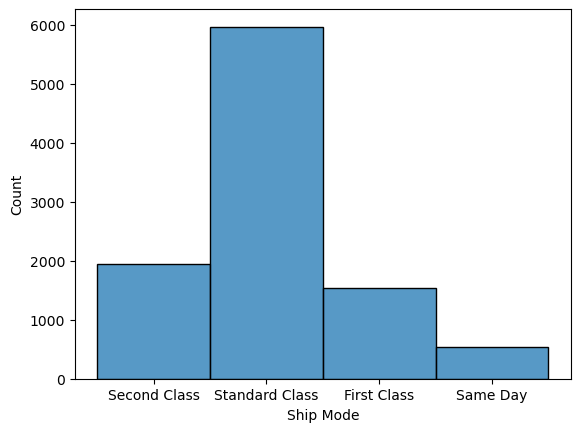

In [32]:
sns.histplot(x=df["Ship Mode"],data=df)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

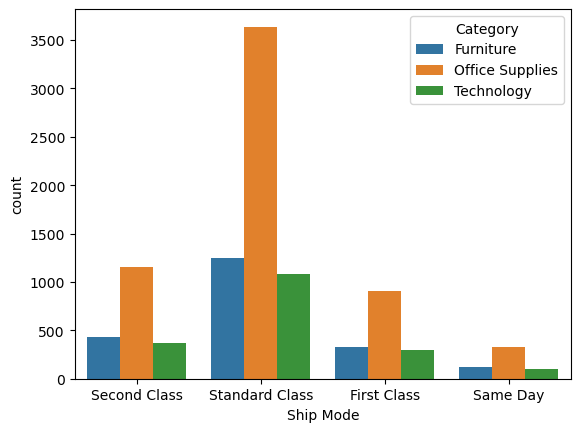

In [54]:
sns.countplot(x=df["Ship Mode"],hue=df['Category'],data=df)

In [104]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [106]:
df['Order Year']=df['Order Date'].dt.year

In [108]:
df['Order Year'].value_counts()

2017    3312
2016    2587
2015    2102
2014    1993
Name: Order Year, dtype: int64

<AxesSubplot:xlabel='Order Year', ylabel='count'>

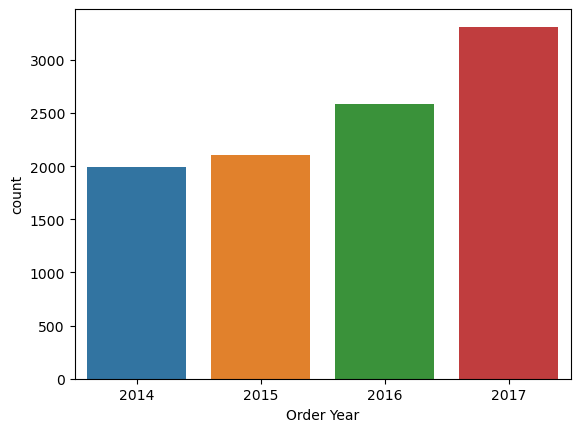

In [111]:
sns.countplot(x=df['Order Year'],data=df)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

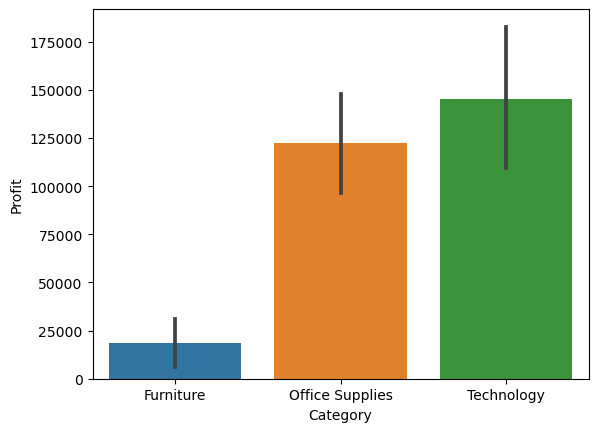

In [115]:
sns.barplot(x=df['Category'],y=df['Profit'],data=df,estimator=sum)

<AxesSubplot:>

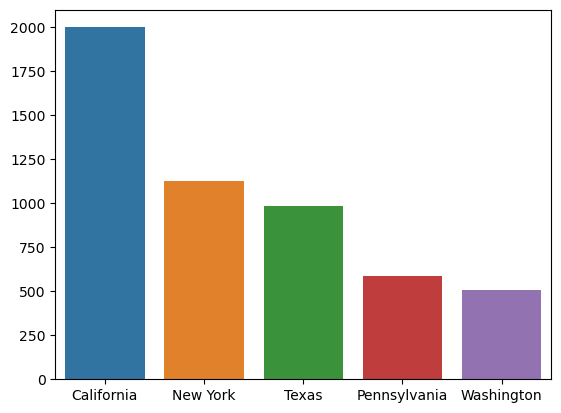

In [138]:
st=df['State'].value_counts()[:5].index
sns.barplot(x=st,y=df['State'].value_counts()[:5].values,data=df)